In [1]:
#Imports
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Deze functie wordt gebruikt om inline the image te kunnen tonen
def plot_with_matlib(image):
    rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.axis('off')
    plt.imshow(rgb_image)
    

# Exercise 1

Write a simple program that detects vertical edges in building.png

## Assignment 1: Use the Sobel operator to calculate the horizontal first-order derivative. Ensure you capture and visualize the negative filter response values by using appropriate datatypes.

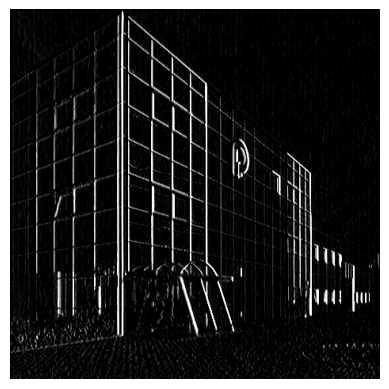

In [66]:
building = cv.imread("./Images/building.png",cv.IMREAD_GRAYSCALE)

# Calculate the horizontal derivative using the Sobel operator
#blurred_image = cv.GaussianBlur(building, (5,5), 0)
sobel_horizontal = cv.Sobel(building, cv.CV_64F, 1,0, ksize=3)
sobel_horizontal_visual = np.clip(sobel_horizontal, 0, 255).astype(np.uint8)
plot_with_matlib(sobel_horizontal_visual)


# Exercise 2
Write a simple program to create a DoG filter and detect the edges of the yellow strips in rays.png with it

## Assignment 2: Create a 15x15 DoG filter using the workflow below

- create a 1D Gaussian kernel with the function getGaussianKernel;
- copy it to the middle row of a square matrix;
- create another 1D Gaussian kernel with a smaller standard deviation;
- filter the square matrix (containing the row kernel) with this row kernel to obtain an elliptical 2D
Gaussian;
- derive this 2D Gaussian with Sobel to obtain a DoG filter;
- make a rotation matrix for a 45 degree rotation with getRotationMatrix2D;
- rotate your DoG filter with this rotation matrix (warpAffine)

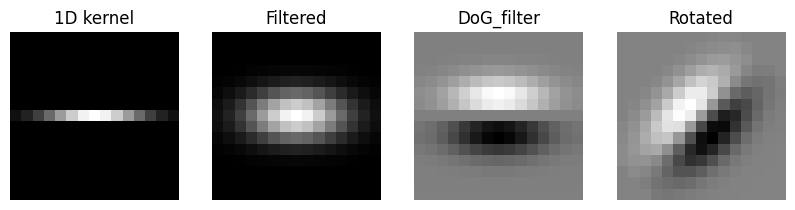

In [26]:
size = 15
sigma1 = 3
sigma2 = 1.5
square = np.zeros((size,size))
fig, axes = plt.subplots(1, 4, figsize=(10, 10))


kernel_1 = cv.getGaussianKernel(size,sigma1).flatten()

kernel_2 = cv.getGaussianKernel(size,sigma2)
DoG_filter = square
DoG_filter[7] = kernel_1
axes[0].imshow(DoG_filter,cmap='gray')
axes[0].set_title("1D kernel")
axes[0].axis('off')


DoG_filter = cv.filter2D(DoG_filter, -1, kernel_2)
axes[1].imshow(DoG_filter,cmap='gray')
axes[1].set_title("Filtered")
axes[1].axis('off')

sobel = cv.Sobel(DoG_filter, cv.CV_64F, 0, 1, ksize=3)
DoG_filter = sobel

axes[2].imshow(DoG_filter,cmap='gray')
axes[2].set_title("DoG_filter")
axes[2].axis('off')

rotation_matrix = cv.getRotationMatrix2D((size/2, size/2), 45, 1)

dog_filter_rotated = cv.warpAffine(DoG_filter, rotation_matrix, (size, size))
axes[3].imshow(dog_filter_rotated,cmap='gray')
axes[3].set_title("Rotated")
axes[3].axis('off')

plt.show()

## Assignment 3: Filter rays.png with a well chosen DoG filter so that in the resulting image, the edges of the yellow strips stand out (you will need to take the absolute value of the responses).

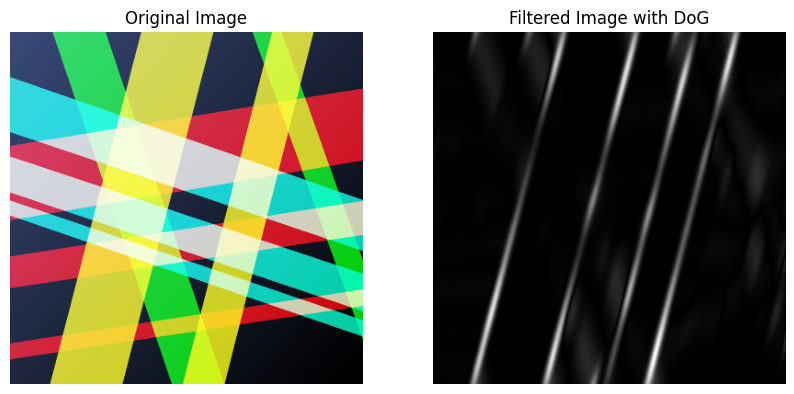

In [105]:
rays_gray = cv.imread("./Images/rays.png",cv.IMREAD_GRAYSCALE)
rays_gray = np.float32(rays_gray)
rays = cv.imread("./Images/rays.png")

# Define the parameters for the Gaussian kernels
sigma1 = 20
sigma2 = 2
size = 99

# Create the Gaussian kernels
kernel1 = cv.getGaussianKernel(ksize=size, sigma=sigma1).transpose()
kernel2 = cv.getGaussianKernel(ksize=size, sigma=sigma2)

dog_filter = np.zeros((size,size))
dog_filter[size//2] = kernel1

# Compute the Difference of Gaussians (DoG) filter
dog_filter = cv.filter2D(dog_filter, -1, kernel_2)

dog_filter = cv.Sobel(dog_filter, cv.CV_64F, 0, 1, ksize=3)
#dog_filter = sobel

rotation_matrix = cv.getRotationMatrix2D((size//2, size//2), 75, 1)

dog_filter_rotated = cv.warpAffine(dog_filter, rotation_matrix, (size, size))

# Convolve the image with the DoG filter
filtered_image_rays = cv.filter2D(rays_gray, -1, dog_filter_rotated)

# Take the absolute value of the filtered image
filtered_image_rays = np.uint8(np.abs(filtered_image_rays))

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(cv.cvtColor(rays, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(filtered_image_rays, cmap='gray')
plt.title('Filtered Image with DoG')
plt.axis('off')
plt.show()


## Question 1: What happens when your filter goes ”across the border” of the image?

Answer: When kernels get into positions it needs to be able to calculate the a new value for the center based on the other values within the kernel area. However the problem lies when the kernel is no longer fully overlapping with the image (ex: at the top left corner). Then we have missing values. The opencv filter2D() method includes a parameter BORDER_TYPE that you can use to specify what the kernel should do at these situations. The default one is REFLECTION_101 this means it will mirror the values from the side overlapping with the image to the side not overlapping in order to fill in for the missing values. However the size of the kernel has a great effect. The bigger the kernel the more missing values we have. This creates this smaller lines that are copied and stretched (see image).

# Exercise 3

Write a simple program that detects all the edges in rays.png.

## Assignment 4: Apply Canny edge detection with thresholds chosen so that the edges of all strips are detected

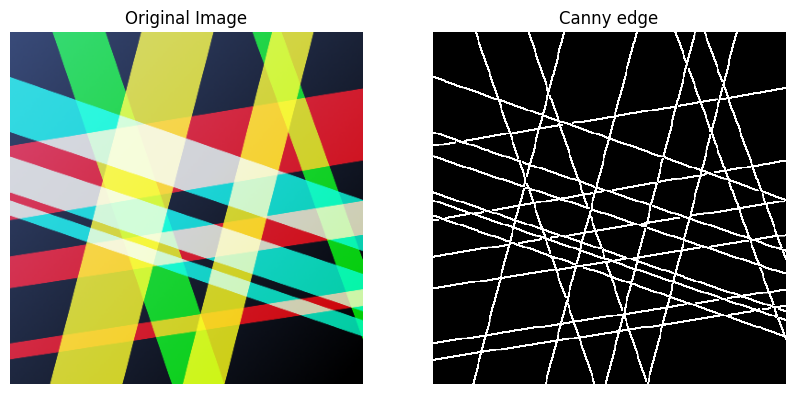

In [10]:
# Convert to grayscale
gray = cv.cvtColor(rays, cv.COLOR_BGR2GRAY)
# Apply Canny edge detection
edges = cv.Canny(gray, 10, 15)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(cv.cvtColor(rays, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray', vmin=0, vmax=1)
plt.title('Canny edge')
plt.axis('off')
plt.show()


# Exercise 4

Write a simple program that does Hough line fitting to painting4.jpg.

## Assignment 5: Apply Canny edge detection so that you get the four edges of the painting, and as few other edges as possible. It is inevitable that you find other edges however.

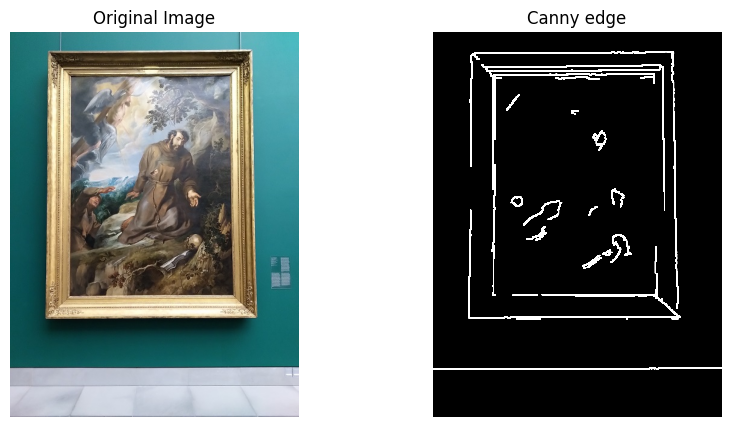

In [62]:
painting = cv.imread("./Images/painting4.jpg")
painting_gray = cv.cvtColor(painting, cv.COLOR_BGR2GRAY)
painting_blurred = cv.blur(painting_gray,(5,5))
edges_painting = cv.Canny(painting_blurred, 100, 250)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(cv.cvtColor(painting, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(edges_painting, cmap='gray', vmin=0, vmax=1)
plt.title('Canny edge')
plt.axis('off')
plt.show()

## Assignment 6: Apply HoughLines to the result of Assignment 5 and visualize the lines on the original image (use the line function). It is normal too get too many lines, since you cannot get the Canny result perfect.

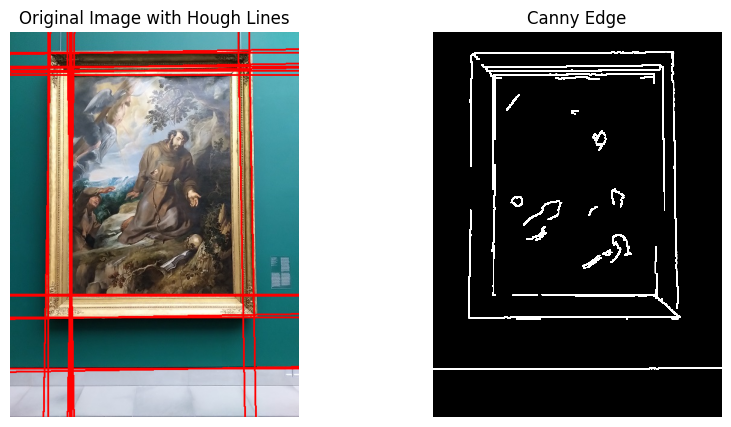

In [63]:
lines = cv.HoughLines(edges_painting, rho=1, theta=np.pi/180, threshold=100)

# Draw the detected lines on the original image
# Code is from: https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv.line(painting, (x1, y1), (x2, y2), (0, 0, 255), 2)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(cv.cvtColor(painting, cv.COLOR_BGR2RGB))
plt.title('Original Image with Hough Lines')

plt.subplot(1, 2, 2)
plt.imshow(edges_painting, cmap='gray', vmin=0, vmax=1)
plt.title('Canny Edge')
plt.axis('off')

plt.show()

# Exercise 5
Write a simple program that detects corners in two images. Try to match the corners across the images.

## Assignment 7 Detect Harris corners in shot1.png and shot2.png and visualize them side by side.

C:\Users\lucas\AppData\Local\Temp\ipykernel_20944\2902286164.py:16: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners1 = np.int0(corners1)
C:\Users\lucas\AppData\Local\Temp\ipykernel_20944\2902286164.py:17: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners2 = np.int0(corners2)


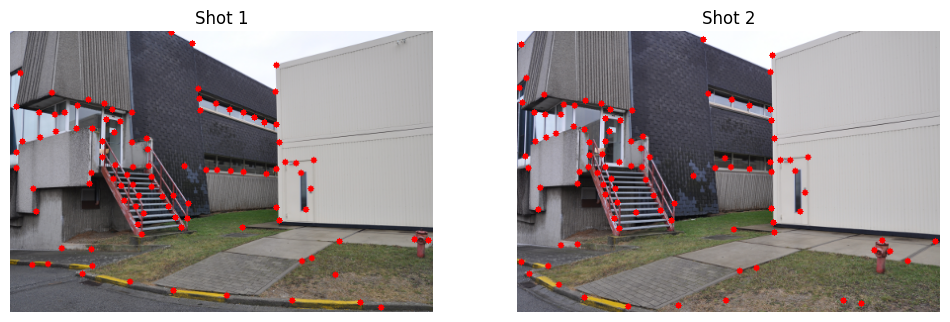

In [117]:
shot1 = cv.imread("./Images/shot1.png")
shot1_gray = cv.cvtColor(shot1,cv.COLOR_BGR2GRAY)
shot2 = cv.imread("./Images/shot2.png")
shot2_gray = cv.cvtColor(shot2,cv.COLOR_BGR2GRAY)


max_corners = 100  # Maximum number of corners to return
quality_level = 0.01  # Minimum accepted quality of corners
min_distance = 10  # Minimum possible Euclidean distance between the returned corners

# Detect corners using goodFeaturesToTrack
corners1 = cv.goodFeaturesToTrack(shot1_gray, max_corners, quality_level, min_distance)
corners2 = cv.goodFeaturesToTrack(shot2_gray, max_corners, quality_level, min_distance)

# Convert corners to integers
corners1 = np.int0(corners1)
corners2 = np.int0(corners2)

# Draw circles around the detected corners
for corner in corners1:
    x, y = corner.ravel()
    cv.circle(shot1, (x, y), 3, (0, 0, 255), -1) 
for corner in corners2:
    x, y = corner.ravel()
    cv.circle(shot2, (x, y), 3, (0, 0, 255), -1)  


fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(cv.cvtColor(shot1, cv.COLOR_BGR2RGB))
axes[0].set_title('Shot 1')
axes[0].axis('off')
axes[1].imshow(cv.cvtColor(shot2, cv.COLOR_BGR2RGB))
axes[1].set_title('Shot 2')
axes[1].axis('off')
plt.show()


## Question 2: Name two kinds of problems you foresee in trying to match these corners.

Answer: The first problem would be that the corners are based on values and don't know about depth. Looking at the white building we have a lot of points on the left edge from top to bottom. There should in theory be only 2 valid points because in real life these two building are not connected to each other, but because of the viewpoint and depth the algorithm see the 2 buildings as one and thinks that there are corners.

The second problem would be lighting, point of view. Because of certain points having a higher difference in contrast due to lighting (shadow to no shadow), the algorithm starts viewing them as corners. Also the angle of where the shot is taken from has a great effect of showing different corners.

There is no solution fix all here.

## Assignment 8: Detect ORB features in each of the two original images, calculate the ORB descriptors for them, and match the descriptors between the two images. Visualize the 32 best matches.

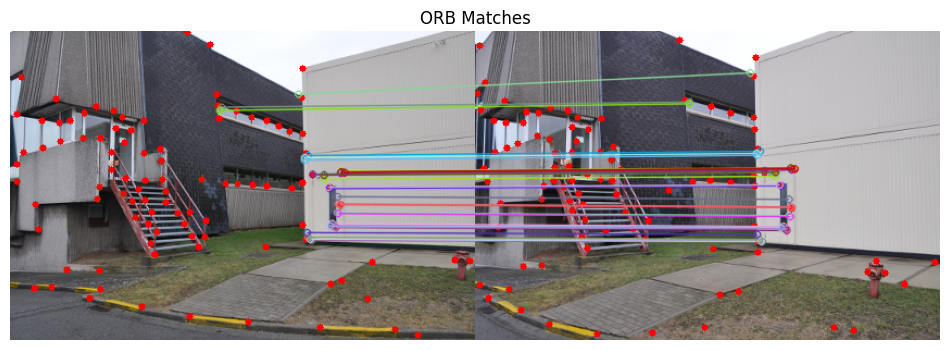

In [118]:
#https://docs.opencv.org/3.4/dc/dc3/tutorial_py_matcher.html

# Initialize ORB detector
orb = cv.ORB_create()

# Detect keypoints and compute descriptors
keypoints1, descriptors1 = orb.detectAndCompute(shot1, None)
keypoints2, descriptors2 = orb.detectAndCompute(shot2, None)

# Create a Brute-Force Matcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors1, descriptors2)

# Sort matches based on their distances
matches = sorted(matches, key=lambda x: x.distance)

# Draw top 32 matches
matching_result = cv.drawMatches(shot1, keypoints1, shot2, keypoints2, matches[:32], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Convert the matching result to RGB (since Matplotlib expects RGB images)
matching_result_rgb = cv.cvtColor(matching_result, cv.COLOR_BGR2RGB)

# Display the matching result using Matplotlib
plt.figure(figsize=(12, 6))
plt.imshow(matching_result_rgb)
plt.axis('off')
plt.title('ORB Matches')
plt.show()